<a href="https://colab.research.google.com/github/MahiraMohammed/ABC-Basket-Ball-Company-Python-Project/blob/main/ML_Assignment_4_Classification_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Breast Cancer Classification using Supervised Learning

Loading and preprocessing

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer


In [40]:
data=load_breast_cancer()

In [41]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [42]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [43]:
df['diagnosis']=data.target

In [44]:
df.duplicated().sum()

0

In [45]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


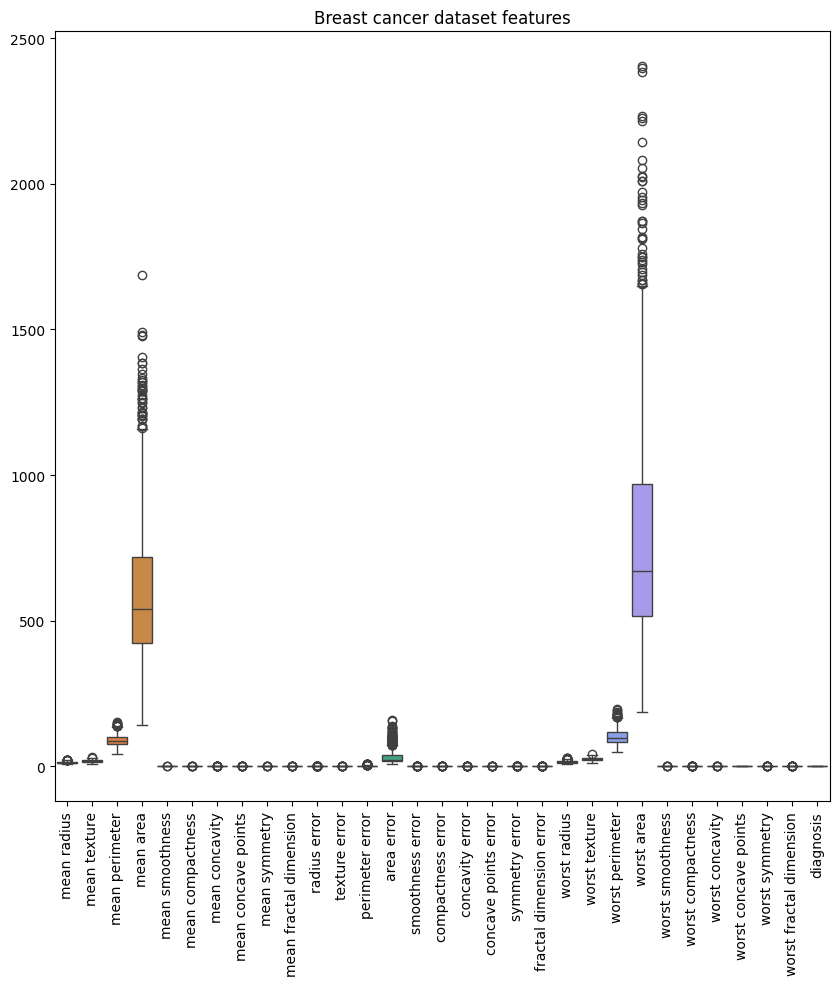

In [88]:
plt.figure(figsize=(10,10))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.title('Breast cancer dataset features')
plt.show()

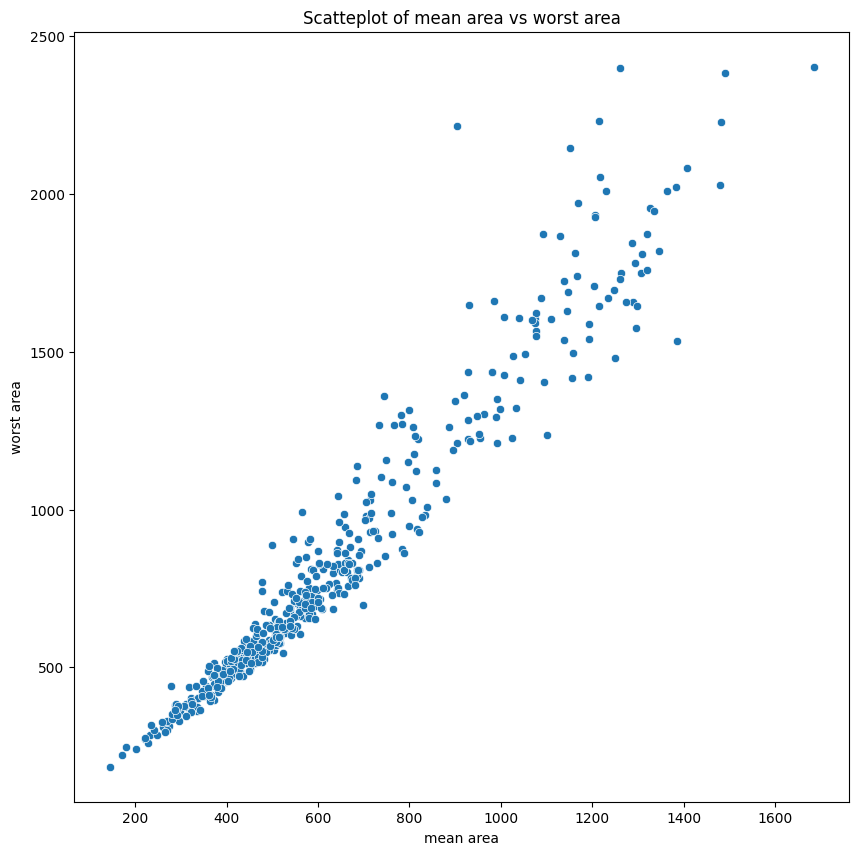

In [89]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='mean area',y='worst area',data=df)
plt.title('Scatteplot of mean area vs worst area')
plt.show()

In [48]:
from scipy import stats
z=np.abs(stats.zscore(df))

In [49]:
outliers=np.where(z>3)
outliers

(array([  0,   3,   3,   3,   3,   3,   3,   3,   3,   9,   9,   9,  12,
         12,  12,  12,  12,  14,  14,  23,  25,  31,  31,  35,  42,  42,
         42,  60,  68,  68,  68,  68,  71,  71,  71,  71,  72,  78,  78,
         78,  78,  78,  82,  82,  82,  82,  82,  82,  82,  83, 105, 105,
        108, 108, 108, 108, 108, 108, 112, 112, 116, 119, 119, 122, 122,
        122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122,
        138, 138, 146, 146, 146, 151, 151, 152, 152, 152, 152, 152, 152,
        176, 176, 180, 180, 180, 180, 180, 180, 180, 181, 181, 190, 190,
        190, 190, 190, 192, 202, 203, 212, 212, 212, 212, 212, 212, 212,
        213, 213, 213, 213, 213, 219, 219, 232, 236, 236, 239, 239, 258,
        258, 258, 259, 259, 265, 265, 265, 265, 265, 288, 288, 290, 290,
        314, 314, 318, 323, 339, 339, 345, 351, 352, 352, 352, 352, 352,
        352, 352, 352, 368, 368, 370, 376, 376, 376, 379, 379, 379, 388,
        389, 400, 416, 417, 417, 430, 461, 461, 461

In [50]:
df.drop(df.index[outliers[0]],inplace=True)

In [51]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321,1
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0


#checking if there is still any outliers

In [52]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
outliers=((df<(Q1-1.5*IQR)))|(df>(Q3+1.5*IQR)).any(axis=1)

In [53]:
outliers

,1,2,4,5,6,7,8,10,11,13,...,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
563,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
#Feature scaling

Feature Scaling: The features in the dataset might have different scales (ranges). Feature scaling using StandardScaler transforms the features to have zero mean and unit variance. This ensures that features with larger values don't disproportionately influence the model and improves algorithm performance, especially for distance-based methods like SVM and k-NN.

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaled=StandardScaler()
df.scaled=scaled.fit_transform(df)

<ipython-input-56-9c1e069b1742>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.scaled=scaled.fit_transform(df)


In [57]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321,1
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0


Classification algorithm implementation
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Support Vector Machine (SVM)
5. k-Nearest Neighbors (k-NN)


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [61]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

1.LogisticRegression
Logistic Regression: A linear model that predicts the probability of a binary outcome. Suitable for this dataset as it can handle high-dimensional data and provides interpretable results.


In [68]:
lr_model=LogisticRegression(max_iter=100)
lr_model.fit(X_train_scaled,y_train)
lr_predictions=lr_model.predict(X_test_scaled)
lr_accuracy=accuracy_score(y_test,lr_predictions)
lr_accuracy



0.9797979797979798

In [69]:
lr_confusion_matrix=confusion_matrix(y_test,lr_predictions)
lr_confusion_matrix

array([[37,  1],
       [ 1, 60]])

In [71]:
lr_classification_report=classification_report(y_test,lr_predictions)
lr_classification_report

'              precision    recall  f1-score   support\n\n           0       0.97      0.97      0.97        38\n           1       0.98      0.98      0.98        61\n\n    accuracy                           0.98        99\n   macro avg       0.98      0.98      0.98        99\nweighted avg       0.98      0.98      0.98        99\n'

Decision Tree Classifier
Builds a tree-like structure to make decisions based on feature values. Can capture non-linear relationships and is easy to understand.


In [72]:
dtc_model=DecisionTreeClassifier()
dtc_model.fit(X_train_scaled,y_train)
dtc_predictions=dtc_model.predict(X_test_scaled)
dtc_accuracy=accuracy_score(y_test,dtc_predictions)
dtc_accuracy

0.9494949494949495

In [73]:
dtc_confusion_matrix=confusion_matrix(y_test,dtc_predictions)
dtc_confusion_matrix

array([[34,  4],
       [ 1, 60]])

In [74]:
dtc_classification_report=classification_report(y_test,dtc_predictions)
dtc_classification_report

'              precision    recall  f1-score   support\n\n           0       0.97      0.89      0.93        38\n           1       0.94      0.98      0.96        61\n\n    accuracy                           0.95        99\n   macro avg       0.95      0.94      0.95        99\nweighted avg       0.95      0.95      0.95        99\n'

3.Random Forest Classifier
An ensemble method that combines multiple decision trees for improved accuracy and robustness. Effective for high-dimensional datasets and reduces overfitting.


In [75]:
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train_scaled,y_train)
rfc_predictions=rfc_model.predict(X_test_scaled)
rfc_accuracy=accuracy_score(y_test,rfc_predictions)
rfc_accuracy

0.98989898989899

4.Support Vector Machine(SVM)
Finds the optimal hyperplane to separate data points into different classes. Can handle complex relationships and is robust to outliers.

In [78]:
svc_model=SVC()
svc_model.fit(X_train_scaled,y_train)
svc_predictions=svc_model.predict(X_test_scaled)
svc_predictions
svc_accuracy=accuracy_score(y_test,svc_predictions)
svc_accuracy

1.0

In [77]:
svc_predictions.shape

(99,)

5.K-NearestNeighbors(K-NN)
Classifies a data point based on the majority class of its k-nearest neighbors. Simple to implement and works well for datasets with clear class boundaries.

In [84]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train_scaled,y_train)
knn_predictions=knn_model.predict(X_test_scaled)
knn_accuracy=accuracy_score(y_test,knn_predictions)
knn_accuracy

0.9696969696969697

In [86]:
Result = pd.DataFrame({
    'Algorithm': ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'SupportVectorClassifier', 'KNearestNeighbors'],
    'Accuracy': [lr_accuracy, dtc_accuracy, rfc_accuracy, svc_accuracy, knn_accuracy]
})


Model Comparison

In [87]:
Result

,Algorithm,Accuracy
0,LogisticRegression,0.979798
1,DecisionTreeClassifier,0.949495
2,RandomForestClassifier,0.989899
3,SupportVectorClassifier,1.000000
4,KNearestNeighbors,0.969697


The SupportVectorCassifier is the best model for this data as it gives 100% accuracy. The least performed model is the DecisonTreeClassifier for this data as it gives only an accuracy score of 94.9%